In [1]:
import mne
import Sleep_Scripts.PCA as P
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data
# files = [
#     "D:/Intracranial_sleep_data/2/iEEG/converted/2_night1_02.vhdr",
#     "D:/Intracranial_sleep_data/2/iEEG/converted/2_night1_02.vhdr",
#     "D:/Intracranial_sleep_data/2/iEEG/converted/2_night1_02.vhdr"
# ]
# 
# raw_list = [mne.io.read_raw_brainvision(f, preload=True) for f in files]
# 
# raw = mne.concatenate_raws(raw_list)
raw = mne.io.read_raw_brainvision("D:/Intracranial_sleep_data/7/iEEG/converted/7_night1_02.vhdr", preload=True)

Extracting parameters from D:/Intracranial_sleep_data/7/iEEG/converted/7_night1_02.vhdr...
Setting channel info structure...
Reading 0 ... 2700031  =      0.000 ... 10800.124 secs...


In [3]:
raw_pos = ch_pos = """TBAL01,-12.1316303379,-38.0523203992,-8.70120673783,3.0,0.0,0.0,1.0
TBAL02,-21.2697937028,-33.0627796608,-19.1011967218,3.0,0.0,0.0,1.0
TBAL03,-31.4963826063,-30.3102555344,-23.7011853396,3.0,0.0,0.0,1.0
TBAL04,-39.4070961952,-24.988661924,-27.6011741523,3.0,0.0,0.0,1.0
TBAR01,22.2663588259,-10.2662962823,-35.4011968194,3.0,0.0,0.0,1.0
TBAR02,31.0946391374,-12.8293465858,-35.4011831537,3.0,0.0,0.0,1.0
TBAR03,40.4924868088,-16.8163122646,-35.4011831537,3.0,0.0,0.0,1.0
TBAR04,50.7446842685,-19.0945783667,-35.4011831537,3.0,0.0,0.0,1.0
TBPL01,-14.228776513,-44.3437589245,-8.70120673783,3.0,0.0,0.0,1.0
TBPL02,-23.1665266137,-40.1077876155,-19.1011967218,3.0,0.0,0.0,1.0
TBPL03,-32.2442691352,-37.2043695613,-25.6011672782,3.0,0.0,0.0,1.0
TBPL04,-41.3633960822,-32.4936371061,-29.8011874416,3.0,0.0,0.0,1.0
TBPR01,19.4185260823,-15.9619617694,-35.4011968194,3.0,0.0,0.0,1.0
TBPR02,27.6772399842,-19.3793616295,-35.4011831537,3.0,0.0,0.0,1.0
TBPR03,37.6446541811,-23.3663273083,-35.4011831537,3.0,0.0,0.0,1.0
TBPR04,50.6585697981,-23.3403668259,-34.1483451917,3.0,0.0,0.0,1.0
TL01,-28.7060516785,-17.6929185236,-15.9236700548,3.0,0.0,0.0,1.0
TL02,-29.0146479028,-21.0930025478,-12.8056643807,3.0,0.0,0.0,1.0
TL03,-29.4319350016,-25.6931313601,-9.66478601871,3.0,0.0,0.0,1.0
TL04,-29.8131513877,-29.8932304213,-5.76697904454,3.0,0.0,0.0,1.0
TL05,-30.9189700014,-34.5933716729,-2.46585762101,3.0,0.0,0.0,1.0
TL06,-31.2703494191,-38.3934793966,0.917481931078,3.0,0.0,0.0,1.0
TL07,-31.9586684977,-42.0935986839,4.36516172902,3.0,0.0,0.0,1.0
TL08,-32.359892103,-46.3937501288,7.88489726214,3.0,0.0,0.0,1.0
TL09,-32.6957781785,-49.9938200299,10.7569876784,3.0,0.0,0.0,1.0
TL10,-33.4064704111,-53.793963097,13.6841906003,3.0,0.0,0.0,1.0
TLL01,-63.3173048868,-36.5169665684,-19.7011997418,3.0,0.0,0.0,1.0
TLL02,-61.5336617232,-47.1244083601,-19.601155859,3.0,0.0,0.0,1.0
TLL03,-60.5763268031,-56.4479388747,-15.6011926024,3.0,0.0,0.0,1.0
TLL04,-55.8601627321,-63.69749642,-9.50118643492,3.0,0.0,0.0,1.0
TLL05,-50.6564044122,-71.7965695944,-4.00120153661,3.0,0.0,0.0,1.0
TLL06,-46.6216781739,-78.0468996223,3.89879300591,3.0,0.0,0.0,1.0
TLR01,62.2845631746,-34.9176530097,-14.6012059479,3.0,0.0,0.0,1.0
TLR02,61.6397119617,-45.20702519,-11.9633780907,3.0,0.0,0.0,1.0
TLR03,59.1723956744,-57.1073549199,-8.80649092817,3.0,0.0,0.0,1.0
TLR04,54.2151245941,-64.6268956358,-7.90117625348,3.0,0.0,0.0,1.0
TLR05,49.0057023451,-73.4313689554,-5.10114587252,3.0,0.0,0.0,1.0
TLR06,42.9675101736,-81.9697971003,-0.901192023593,3.0,0.0,0.0,1.0
TR01,21.4677056578,-15.1974381006,-19.9494708852,3.0,0.0,0.0,1.0
TR02,22.2869214109,-19.2974966404,-16.60749768,3.0,0.0,0.0,1.0
TR03,22.7528485487,-22.4975863674,-12.8267265633,3.0,0.0,0.0,1.0
TR04,23.9441558277,-26.9977447182,-9.6794839262,3.0,0.0,0.0,1.0
TR05,24.4556665855,-30.7978189571,-5.77191726862,3.0,0.0,0.0,1.0
TR06,25.2966753433,-34.2979343774,-2.1220248131,3.0,0.0,0.0,1.0
TR07,26.5261723889,-38.4980770953,2.27573668081,3.0,0.0,0.0,1.0
TR08,27.416046728,-42.3981902677,5.72813687028,3.0,0.0,0.0,1.0
TR09,28.2759873136,-45.4982850351,9.92699493228,3.0,0.0,0.0,1.0
TR10,28.8575872083,-49.6983862476,13.8713226304,3.0,0.0,0.0,1.0
"""

PC1 top channel: TBAR1


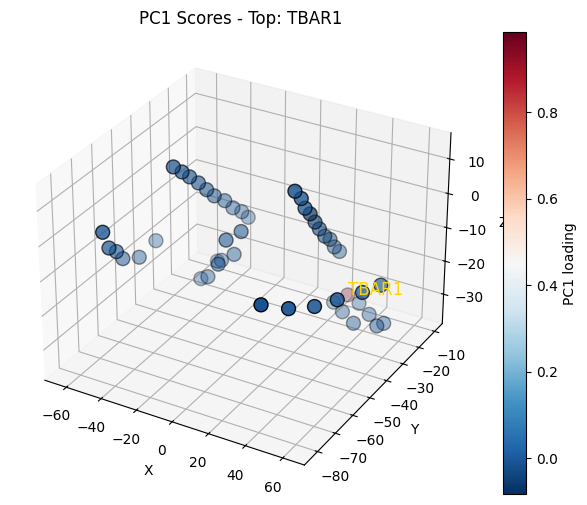

PC2 top channel: TR07


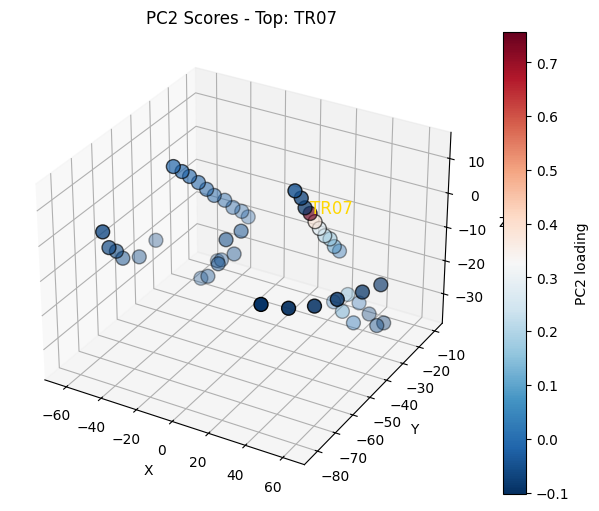

In [4]:
# band options are: beta, gamma, delta, theta, sigma, total and noise
df_features = P.channel_pca_multiband(raw, raw_pos, bands='delta')

In [6]:
print(df_features)

{'pca_loadings': array([[ 0.98538584, -0.02019236, -0.01401156, -0.01205094, -0.02054857,
        -0.02747768, -0.02059636, -0.01454852, -0.00948201, -0.00970659,
        -0.01012133, -0.01006445, -0.00958294, -0.010052  , -0.01841658,
        -0.0161144 , -0.01726075, -0.0166887 , -0.01516479, -0.01608242,
        -0.0140029 , -0.01508084, -0.01181025, -0.01222539, -0.01351294,
        -0.01148116, -0.00903554, -0.00632267, -0.0296664 , -0.03373531,
        -0.03893847, -0.0402334 , -0.04538842, -0.05415684, -0.08310594,
        -0.01780795, -0.01757288, -0.02000496, -0.02205991, -0.02232822,
        -0.02302949, -0.02273594, -0.02246602, -0.02242482, -0.02227451,
        -0.02193659, -0.02185971, -0.02202271],
       [ 0.08726176, -0.01056836, -0.07014316, -0.08286382,  0.01384232,
         0.0677804 ,  0.00425863, -0.05808786, -0.09359332, -0.09489466,
        -0.09559462, -0.09809103, -0.10241116, -0.09428242, -0.0482736 ,
        -0.04934732, -0.03761272, -0.05076438, -0.05565897,

C:\Users\timmi\AppData\Local\Temp\ipykernel_13272\4094350691.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  band_power[i] = np.trapz(psd[mask], freqs[mask])


Top channel for delta band: TR07


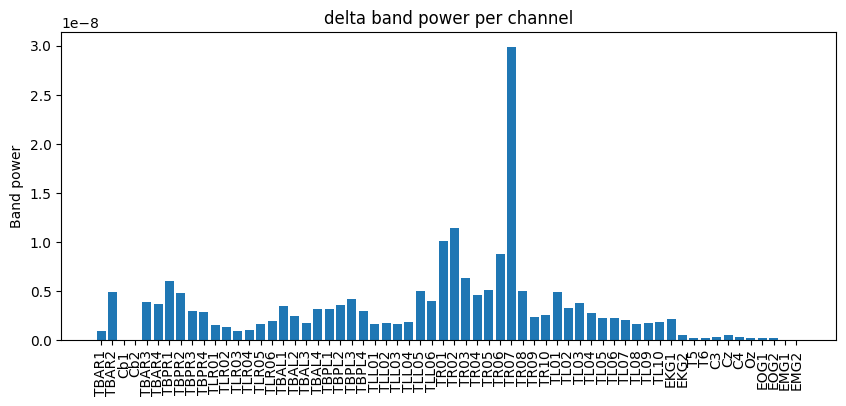

In [ ]:
from scipy.signal import welch
bands = {
    "delta": (0.5, 5),
    "theta": (6, 10),
    "sigma": (11, 17),
    "beta":  (22, 30),
    "gamma": (35, 45),
    "total": (0.5, 45)
}
fs = raw.info['sfreq']  # sampling rate
n_channels = len(raw.ch_names)
band_power = np.zeros(n_channels)
for band_range in bands.keys():
    band = bands[band_range]
    for i, ch in enumerate(raw.ch_names):
        data = raw.get_data(picks=[ch])[0]  # get channel data
        freqs, psd = welch(data, fs=fs, nperseg=fs*2)  # 2-second windows
        mask = (freqs >= band[0]) & (freqs <= band[1])
        band_power[i] = np.trapz(psd[mask], freqs[mask])
    top_idx = np.argmax(band_power)
    top_channel = raw.ch_names[top_idx]
    print(f"Top channel for delta band: {top_channel}")
    
    plt.figure(figsize=(10,4))
    plt.bar(raw.ch_names, band_power)
    plt.xticks(rotation=90)
    plt.ylabel('Band power')
    plt.title(f'{band_range} band power per channel')
    plt.show()
